In [ ]:
# Data Describtion 
# "Absolute"refers to values observed at earth while "AAdjusted" refers to values adjuted to 1-Au
#Absolute/Adjusted Radio Flux:10.7 cm daily averaged radio flux with interploted data gaps
# Corrected Absolute /Adjusted Radio Flux:10.7 cm daily averaged radio flux with interploted data gaps
#Absolute/Adjusted Radio Flux flag:Flag indicating the processing applied


In [56]:
# The Prediction of solar flux
#import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression


In [57]:
df =pd.read_csv('radio_flux_f107.csv')
df
# it is a must to describe each column 

,time (yyyy MM dd),absolute_f107,absolute_f107_c(SFU),absolute_f107_p(SFU),absolute_f107_f,adjusted_f107 (SFU),adjusted_f107_c (SFU),adjusted_f107_p(SFU),adjusted_f107_f
0,1951 11 1,107.3,107.3,3.6,0,105.6,105.6,3.6,0
1,1951 11 2,104.7,104.7,3.6,0,103.0,103.0,3.6,0
2,1951 11 3,106.1,106.1,3.6,2,104.3,104.3,3.6,2
3,1951 11 4,107.2,107.2,3.6,0,105.3,105.3,3.6,0
4,1951 11 5,114.0,114.0,3.6,0,112.0,112.0,3.6,0
...,...,...,...,...,...,...,...,...,...
25973,2022 12 11,148.0,148.0,5.2,1,143.4,143.4,5.1,1
25974,2022 12 12,151.0,151.0,5.2,1,146.2,146.2,5.1,1
25975,2022 12 13,153.0,153.0,5.3,1,148.1,148.1,5.1,1
25976,2022 12 14,165.0,165.0,5.3,1,159.7,159.7,5.1,1


In [58]:
df.shape

(25978, 9)

In [60]:
df.describe()

,absolute_f107,absolute_f107_c(SFU),absolute_f107_p(SFU),absolute_f107_f,adjusted_f107 (SFU),adjusted_f107_c (SFU),adjusted_f107_p(SFU),adjusted_f107_f
count,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000
mean,120.525980,120.444545,4.482982,0.161213,120.491808,120.410559,4.481119,0.161213
std,52.072311,51.997695,3.035101,0.564398,51.864869,51.791176,3.030857,0.564398
min,61.100000,61.100000,1.400000,0.000000,61.600000,61.600000,1.400000,0.000000
25%,77.000000,77.000000,2.100000,0.000000,76.800000,76.800000,2.100000,0.000000
50%,103.000000,102.800000,3.700000,0.000000,103.100000,103.000000,3.600000,0.000000
75%,151.300000,151.100000,6.200000,0.000000,151.300000,151.200000,6.200000,0.000000
max,383.900000,383.900000,118.700000,6.000000,371.100000,371.100000,122.700000,6.000000


In [27]:
df.isna().sum() # search if any column has any not a number (is not a number)

time (yyyy MM dd)        0
absolute_f107            0
absolute_f107_c(SFU)     0
absolute_f107_p(SFU)     0
absolute_f107_f          0
adjusted_f107 (SFU)      0
adjusted_f107_c (SFU)    0
adjusted_f107_p(SFU)     0
adjusted_f107_f          0
dtype: int64

In [61]:
df.info()
# a column which has object has a problem
# we need to rename columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25978 entries, 0 to 25977
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time (yyyy MM dd)      25978 non-null  object 
 1   absolute_f107          25978 non-null  float64
 2   absolute_f107_c(SFU)   25978 non-null  float64
 3   absolute_f107_p(SFU)   25978 non-null  float64
 4   absolute_f107_f        25978 non-null  int64  
 5   adjusted_f107 (SFU)    25978 non-null  float64
 6   adjusted_f107_c (SFU)  25978 non-null  float64
 7   adjusted_f107_p(SFU)   25978 non-null  float64
 8   adjusted_f107_f        25978 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 1.8+ MB


In [45]:
# Wrangle your data
# change column names
#df.columns = ['time','absolute_f107_c'] must change all columns names
#df.head()

In [62]:
# change the word "object" to time series data
df['time (yyyy MM dd)'] = pd.to_datetime(df['time (yyyy MM dd)'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25978 entries, 0 to 25977
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time (yyyy MM dd)      25978 non-null  datetime64[ns]
 1   absolute_f107          25978 non-null  float64       
 2   absolute_f107_c(SFU)   25978 non-null  float64       
 3   absolute_f107_p(SFU)   25978 non-null  float64       
 4   absolute_f107_f        25978 non-null  int64         
 5   adjusted_f107 (SFU)    25978 non-null  float64       
 6   adjusted_f107_c (SFU)  25978 non-null  float64       
 7   adjusted_f107_p(SFU)   25978 non-null  float64       
 8   adjusted_f107_f        25978 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 1.8 MB


In [78]:
# to make time column as an indexing
#df.set_index('time (yyyy MM dd)',inplace=True)
#df.head()

<AxesSubplot:xlabel='time (yyyy MM dd)'>

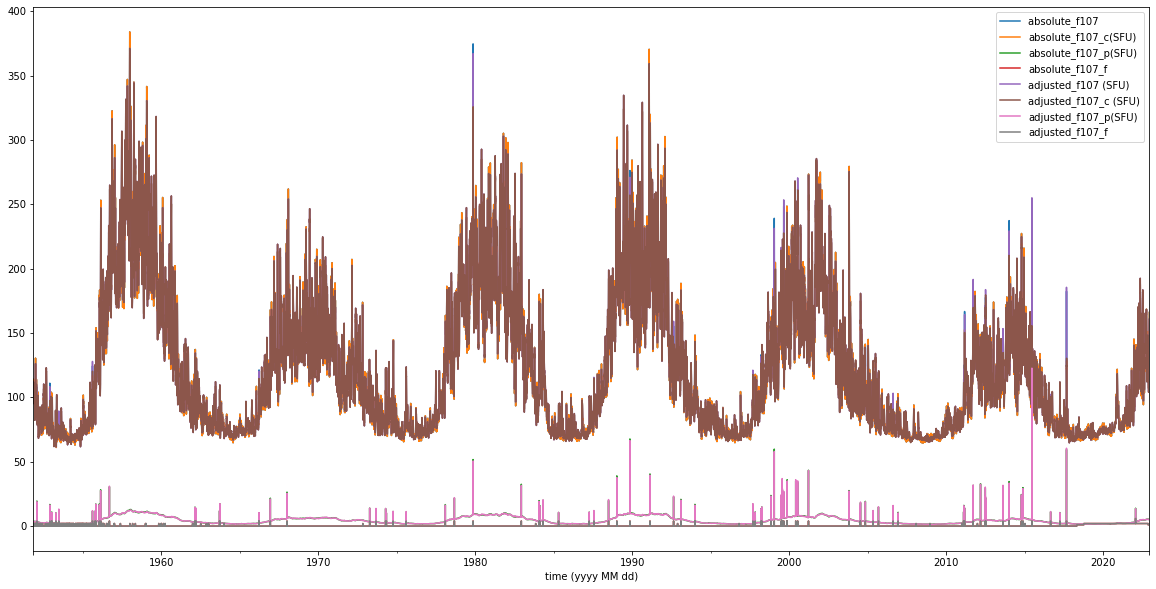

In [68]:
df.plot(figsize=(20,10))

In [77]:
# count every value how many repeats
#df['time (yyyy MM dd)'].value_counts() to show if there is any null value

In [33]:

df['absolute_f107_c(SFU)'].value_counts()

71.0     104
68.0     101
69.0     100
70.0      92
73.0      90
        ... 
304.5      1
242.7      1
229.1      1
319.8      1
190.4      1
Name: absolute_f107_c(SFU), Length: 2224, dtype: int64

In [87]:
df['absolute_f107_p(SFU)'].value_counts()

1.8     1451
1.9     1320
1.7     1229
1.6     1062
2.1      763
        ... 
19.2       1
15.9       1
36.1       1
67.7       1
29.3       1
Name: absolute_f107_p(SFU), Length: 177, dtype: int64

In [89]:
# using for loop to check if there any null value in column
for col in df.columns:# put every column in dataframe(df)in this variable"col"
    print(f'for column {col}') #(f) refers to format string 
    print('----------------')
    print(df[col].value_counts())
    print('\n')

for column absolute_f107 
----------------
71.0     104
68.0     101
69.0     100
70.0      92
73.0      90
        ... 
220.0      1
257.8      1
242.9      1
280.9      1
190.4      1
Name: absolute_f107 , Length: 2226, dtype: int64


for column absolute_f107_c(SFU)
----------------
71.0     104
68.0     101
69.0     100
70.0      92
73.0      90
        ... 
304.5      1
242.7      1
229.1      1
319.8      1
190.4      1
Name: absolute_f107_c(SFU), Length: 2224, dtype: int64


for column absolute_f107_p(SFU)
----------------
1.8     1451
1.9     1320
1.7     1229
1.6     1062
2.1      763
        ... 
19.2       1
15.9       1
36.1       1
67.7       1
29.3       1
Name: absolute_f107_p(SFU), Length: 177, dtype: int64


for column absolute_f107_f
----------------
0    23882
2     1808
1      194
4       93
6        1
Name: absolute_f107_f, dtype: int64


for column adjusted_f107 (SFU)
----------------
69.6     90
70.3     89
69.8     87
70.9     86
71.4     86
         ..
257.4    

In [92]:
df.dropna(axis=0,inplace=True)
df

,absolute_f107,absolute_f107_c(SFU),absolute_f107_p(SFU),absolute_f107_f,adjusted_f107 (SFU),adjusted_f107_c (SFU),adjusted_f107_p(SFU),adjusted_f107_f
time (yyyy MM dd),,,,,,,,
1951-11-01,107.3,107.3,3.6,0,105.6,105.6,3.6,0
1951-11-02,104.7,104.7,3.6,0,103.0,103.0,3.6,0
1951-11-03,106.1,106.1,3.6,2,104.3,104.3,3.6,2
1951-11-04,107.2,107.2,3.6,0,105.3,105.3,3.6,0
1951-11-05,114.0,114.0,3.6,0,112.0,112.0,3.6,0
...,...,...,...,...,...,...,...,...
2022-12-11,148.0,148.0,5.2,1,143.4,143.4,5.1,1
2022-12-12,151.0,151.0,5.2,1,146.2,146.2,5.1,1
2022-12-13,153.0,153.0,5.3,1,148.1,148.1,5.1,1


In [94]:
list(df.columns)

['absolute_f107 ',
 'absolute_f107_c(SFU)',
 'absolute_f107_p(SFU)',
 'absolute_f107_f',
 'adjusted_f107 (SFU)',
 'adjusted_f107_c (SFU)',
 'adjusted_f107_p(SFU)',
 'adjusted_f107_f']

In [96]:
df =pd.get_dummies(df,columns=['absolute_f107_c(SFU)','absolute_f107_p(SFU)','absolute_f107_f'])
df                               

,absolute_f107,adjusted_f107 (SFU),adjusted_f107_c (SFU),adjusted_f107_p(SFU),adjusted_f107_f,absolute_f107_c(SFU)_61.1,absolute_f107_c(SFU)_62.6,absolute_f107_c(SFU)_62.9,absolute_f107_c(SFU)_63.1,absolute_f107_c(SFU)_63.5,...,absolute_f107_p(SFU)_51.7,absolute_f107_p(SFU)_59.5,absolute_f107_p(SFU)_59.8,absolute_f107_p(SFU)_67.7,absolute_f107_p(SFU)_118.7,absolute_f107_f_0,absolute_f107_f_1,absolute_f107_f_2,absolute_f107_f_4,absolute_f107_f_6
time (yyyy MM dd),,,,,,,,,,,,,,,,,,,,,
1951-11-01,107.3,105.6,105.6,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1951-11-02,104.7,103.0,103.0,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1951-11-03,106.1,104.3,104.3,3.6,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1951-11-04,107.2,105.3,105.3,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1951-11-05,114.0,112.0,112.0,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11,148.0,143.4,143.4,5.1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2022-12-12,151.0,146.2,146.2,5.1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2022-12-13,153.0,148.1,148.1,5.1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
# to drop column
x =df.drop('absolute_f107 ',axis=1)
x

,adjusted_f107 (SFU),adjusted_f107_c (SFU),adjusted_f107_p(SFU),adjusted_f107_f,absolute_f107_c(SFU)_61.1,absolute_f107_c(SFU)_62.6,absolute_f107_c(SFU)_62.9,absolute_f107_c(SFU)_63.1,absolute_f107_c(SFU)_63.5,absolute_f107_c(SFU)_64.1,...,absolute_f107_p(SFU)_51.7,absolute_f107_p(SFU)_59.5,absolute_f107_p(SFU)_59.8,absolute_f107_p(SFU)_67.7,absolute_f107_p(SFU)_118.7,absolute_f107_f_0,absolute_f107_f_1,absolute_f107_f_2,absolute_f107_f_4,absolute_f107_f_6
time (yyyy MM dd),,,,,,,,,,,,,,,,,,,,,
1951-11-01,105.6,105.6,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1951-11-02,103.0,103.0,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1951-11-03,104.3,104.3,3.6,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1951-11-04,105.3,105.3,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1951-11-05,112.0,112.0,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-11,143.4,143.4,5.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2022-12-12,146.2,146.2,5.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2022-12-13,148.1,148.1,5.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [105]:
y = df['absolute_f107 ']

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [108]:
x_train.shape

(20782, 2410)

In [109]:
x_test.shape

(5196, 2410)

In [110]:
y_train.shape

(20782,)

In [111]:
y_test.shape

(5196,)

In [123]:
model =LinearRegression()

In [124]:
model.fit(x_train ,y_train)

LinearRegression()

In [125]:
model.score(x_train ,y_train)


0.9999999862423188

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25978 entries, 1951-11-01 to 2022-12-15
Columns: 2411 entries, absolute_f107  to absolute_f107_f_6
dtypes: float64(4), int64(1), uint8(2406)
memory usage: 60.8 MB


In [126]:
y_pred = model.predict(x_test)
y_pred

array([171.20089484, 139.00040497, 167.30006021, ...,  68.59913616,
       129.40005251, 132.59983712])

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1773123837.0607338

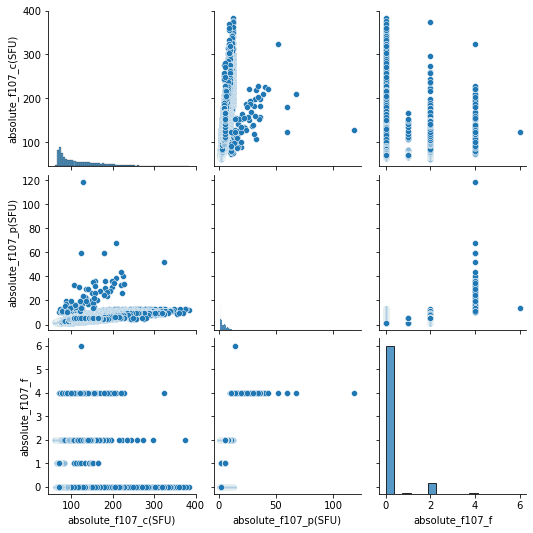

In [39]:
# to show if there is any linear relationship
sns.pairplot(df[['time (yyyy MM dd)','absolute_f107_c(SFU)','absolute_f107_p(SFU)','absolute_f107_f']])

In [40]:
df[['time (yyyy MM dd)','absolute_f107_c(SFU)','absolute_f107_p(SFU)','absolute_f107_f']].corr()

,absolute_f107_c(SFU),absolute_f107_p(SFU),absolute_f107_f
absolute_f107_c(SFU),1.000000,0.819647,-0.146618
absolute_f107_p(SFU),0.819647,1.000000,-0.014363
absolute_f107_f,-0.146618,-0.014363,1.000000


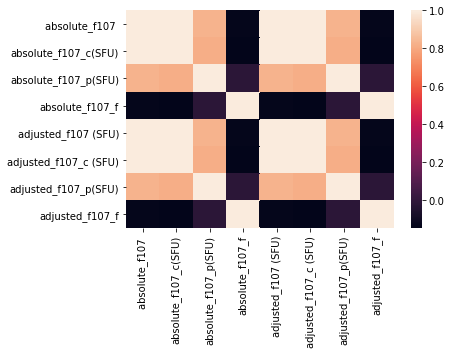

In [76]:
# how to show Confusion Matrix
sns.heatmap(df.corr(),cmap=None)
plt.show()